In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
import keras 


In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train.shape,y_train.shape,'******',X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
y_train[0]


9

In [9]:
class_labels=["Tshirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]
class_labels

['Tshirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

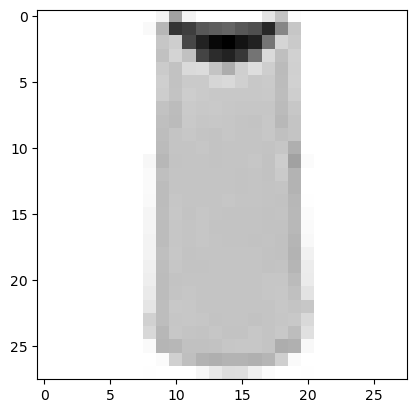

In [10]:
plt.imshow(X_train[2], cmap='Greys')

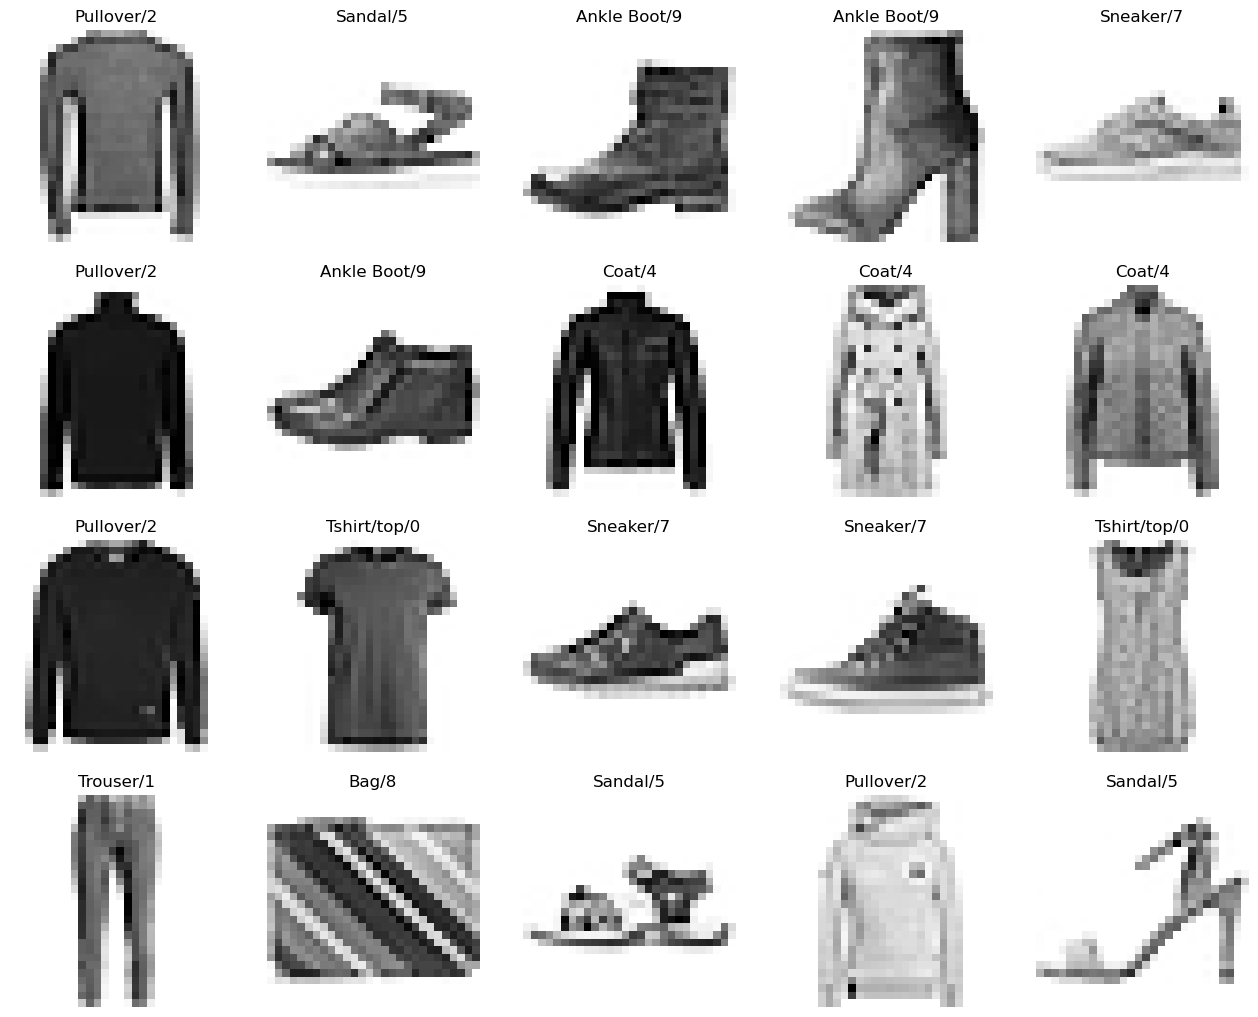

In [11]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,20):
    plt.subplot(5,5,j)
    j+=1
    plt.imshow(X_train[i],cmap='Greys')
    plt.axis('off')
    plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train.ndim

3

In [14]:
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [15]:
X_train.ndim

4

In [16]:
X_train=X_train/255
X_test=X_test/255

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [18]:
X_train.shape,y_train.shape,X_validation.shape,y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [19]:
cnn_model=keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=256,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
    
])

In [20]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train,y_train,epochs=20,batch_size=16,verbose=1,validation_data=(X_validation,y_validation))

Epoch 1/20
3000/3000 [==============================] - 26s 9ms/step - loss: 0.5672 - accuracy: 0.7885 - val_loss: 0.3994 - val_accuracy: 0.8496
Epoch 2/20
3000/3000 [==============================] - 26s 9ms/step - loss: 0.3729 - accuracy: 0.8625 - val_loss: 0.3431 - val_accuracy: 0.8689
Epoch 3/20
3000/3000 [==============================] - 27s 9ms/step - loss: 0.3259 - accuracy: 0.8794 - val_loss: 0.3123 - val_accuracy: 0.8864
Epoch 4/20
3000/3000 [==============================] - 26s 9ms/step - loss: 0.2959 - accuracy: 0.8922 - val_loss: 0.3144 - val_accuracy: 0.8802
Epoch 5/20
3000/3000 [==============================] - 26s 9ms/step - loss: 0.2748 - accuracy: 0.8998 - val_loss: 0.2957 - val_accuracy: 0.8915
Epoch 6/20
3000/3000 [==============================] - 25s 8ms/step - loss: 0.2553 - accuracy: 0.9053 - val_loss: 0.3098 - val_accuracy: 0.8877
Epoch 7/20
3000/3000 [==============================] - 25s 8ms/step - loss: 0.2465 - accuracy: 0.9100 - val_loss: 0.2760 - val_ac

In [21]:
y_pred=cnn_model.predict(X_test)
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3120 - accuracy: 0.8998


[0.3120479881763458, 0.8998000025749207]

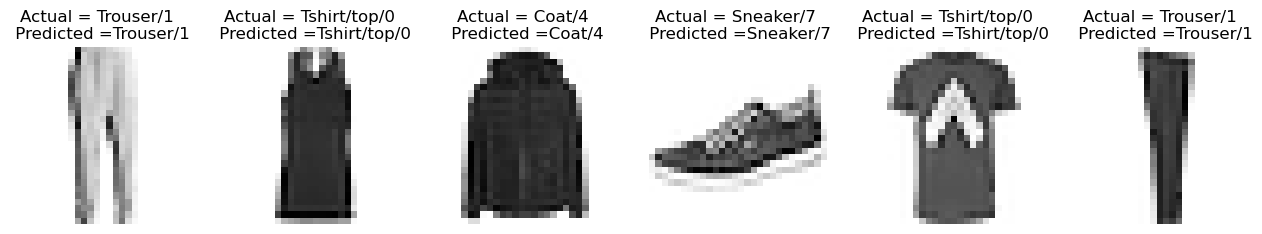

In [22]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(0,1000,6):
    plt.subplot(10,6,j)
    j+=1
    plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
    
    plt.title('Actual = {}/{} \n Predicted ={}/{}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
    plt.axis('off')

In [24]:
cnn_model.save('E:/Train_model/fashion.h5')
